# Capstone Group 8
## House Rent Prediction

### Introduction

As international or domestic students, many students arrive from various locations and countries,making it difficult for them to estimate the rent they must pay. Moreover, each student has unique requirements and options. As a result, their calculations for budgeting and spending could
be challenging. Since housing is one of the most important basic requirements,we decided to do an analysis that will be useful for the current students as well as future cohorts in determining the proper rent price that is most suitable for them in order to attend the university. Each student has
a unique background and specific preference. This is why we chose this dataset, which included characteristics such as the number of bedrooms, bathrooms, furnished options, laundry, parking options, pets allowed, smoking allowed or not, wheelchair accessibility, or even electric vehicle charging capabilities. We believe that these characteristics could be the factor contributing to the
rental price.

Importing the necessary Libraries

In [1]:
# Importing all the neccessary Libraries
import pandas as pd
import numpy as np
from numpy import nan
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import capstone_group08Final as utility
%matplotlib inline
import opendatasets as od

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

### As requested in the instructions we are directly importing our database from Kaggle.
    1.To achieve this we first installed the library opendatasets, use command pip install 'opendatasets' to install it
    2.Once it has been successfully installed import opendatasets as od
    3.Then you can normally download the dataset from kaggle just by passing the url, your username and API Token Key
    4.Once downloaded it creates a folder in your Jupyter Notebook Library where it stores the database. 
    
If you dont have a kaggle account, you can use my API Token Key to download the data.

Username: kavyapratapsingh

API Token Key: 2378506db15c8c3518530c81d8ab42f1

In [2]:
od.download("https://www.kaggle.com/datasets/rkb0023/houserentpredictiondataset")

Skipping, found downloaded files in ".\houserentpredictiondataset" (use force=True to force download)


In [3]:
data = pd.read_csv('houserentpredictiondataset\houseRent\housing_train.csv')
data.shape

(265190, 22)

# Data Description
#### Here I will evaluate the dataset, check different columns, datatypes, check for missing values and proceed accordingly

In [4]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

Checking the number of columns present with datatypes and Non-Null count(with the help of info command).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

Getting an insight of dataframe withe help of head command.

In [6]:
data.head(2)

id                                                url      region  \
0  7039061606  https://bham.craigslist.org/apa/d/birmingham-h...  birmingham   
1  7041970863  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   

                    region_url  price       type  sqfeet  beds  baths  \
0  https://bham.craigslist.org   1195  apartment    1908     3    2.0   
1  https://bham.craigslist.org   1120  apartment    1319     3    2.0   

   cats_allowed  ...  wheelchair_access  electric_vehicle_charge  \
0             1  ...                  0                        0   
1             1  ...                  0                        0   

   comes_furnished  laundry_options     parking_options  \
0                0  laundry on site      street parking   
1                0  laundry on site  off-street parking   

                                           image_url  \
0  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1  https://images.craigslist.org/00707_uRrY9CsNMC...   

                                         description      lat     long  state  
0  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al  
1  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045     al  

[2 rows x 22 columns]

In [7]:
data.head(2).append(data.tail(2))

id                                                url  \
0       7039061606  https://bham.craigslist.org/apa/d/birmingham-h...   
1       7041970863  https://bham.craigslist.org/apa/d/birmingham-w...   
265188  7050885800  https://columbus.craigslist.org/apa/d/newark-l...   
265189  7050884586  https://columbus.craigslist.org/apa/d/columbus...   

            region                       region_url  price       type  sqfeet  \
0       birmingham      https://bham.craigslist.org   1195  apartment    1908   
1       birmingham      https://bham.craigslist.org   1120  apartment    1319   
265188    columbus  https://columbus.craigslist.org   1001  apartment    1220   
265189    columbus  https://columbus.craigslist.org   1164  townhouse    1300   

        beds  baths  cats_allowed  ...  wheelchair_access  \
0          3    2.0             1  ...                  0   
1          3    2.0             1  ...                  0   
265188     3    1.5             1  ...                  0   
265189     2    2.5             1  ...                  0   

        electric_vehicle_charge  comes_furnished  laundry_options  \
0                             0                0  laundry on site   
1                             0                0  laundry on site   
265188                        0                0      w/d hookups   
265189                        0                0      w/d hookups   

           parking_options                                          image_url  \
0           street parking  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1       off-street parking  https://images.craigslist.org/00707_uRrY9CsNMC...   
265188  off-street parking  https://images.craigslist.org/00J0J_6VSTqFJb86...   
265189     attached garage  https://images.craigslist.org/00w0w_h1L3gxb8rG...   

                                              description      lat     long  \
0       Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065   
1       Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045   
265188  www.McMillenWoods.com  www.mcmillenwoods.com  ...  40.0451 -82.4564   
265189  Park Club apartments is offering some of the B...      NaN      NaN   

        state  
0          al  
1          al  
265188     oh  
265189    NaN  

[4 rows x 22 columns]

In [8]:
data.describe()

id         price        sqfeet           beds          baths  \
count  2.651900e+05  2.651900e+05  2.651900e+05  265190.000000  265190.000000   
mean   7.040888e+09  1.227285e+04  1.093678e+03       1.912414       1.483468   
std    8.778930e+06  5.376352e+06  2.306888e+04       3.691900       0.630208   
min    7.003808e+09  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    7.035963e+09  8.170000e+02  7.520000e+02       1.000000       1.000000   
50%    7.043109e+09  1.060000e+03  9.500000e+02       2.000000       1.000000   
75%    7.048362e+09  1.450000e+03  1.156000e+03       2.000000       2.000000   
max    7.051263e+09  2.768307e+09  8.388607e+06    1100.000000      75.000000   

        cats_allowed   dogs_allowed  smoking_allowed  wheelchair_access  \
count  265190.000000  265190.000000    265190.000000      265190.000000   
mean        0.716822       0.696550         0.733896           0.078759   
std         0.450543       0.459749         0.441920           0.269362   
min         0.000000       0.000000         0.000000           0.000000   
25%         0.000000       0.000000         0.000000           0.000000   
50%         1.000000       1.000000         1.000000           0.000000   
75%         1.000000       1.000000         1.000000           0.000000   
max         1.000000       1.000000         1.000000           1.000000   

       electric_vehicle_charge  comes_furnished            lat           long  
count            265190.000000    265190.000000  263771.000000  263771.000000  
mean                  0.014360         0.048644      37.208855     -92.398149  
std                   0.118968         0.215124       5.659648      17.370780  
min                   0.000000         0.000000     -43.533300    -163.894000  
25%                   0.000000         0.000000      33.508500    -104.704000  
50%                   0.000000         0.000000      37.984900     -86.478300  
75%                   0.000000         0.000000      41.168400     -81.284600  
max                   1.000000         1.000000     102.036000     172.633000

# Missing values
Let's go ahead and find out which variables of the dataset contain missing values.

Show if there are missing datapoints

In [9]:
data.isna().sum().sort_values(ascending=False)

parking_options            95135
laundry_options            54311
long                        1419
lat                         1419
description                    2
state                          1
url                            0
image_url                      0
comes_furnished                0
electric_vehicle_charge        0
wheelchair_access              0
id                             0
dogs_allowed                   0
cats_allowed                   0
baths                          0
beds                           0
sqfeet                         0
type                           0
price                          0
region_url                     0
region                         0
smoking_allowed                0
dtype: int64

As we can see that parking_options and laundary_options have the most number of missing values, followed by longitude and latitude.
Lets plot a few charts to visualize this information as well

### Plotting a few charts to see the missing values column wise

<AxesSubplot:>

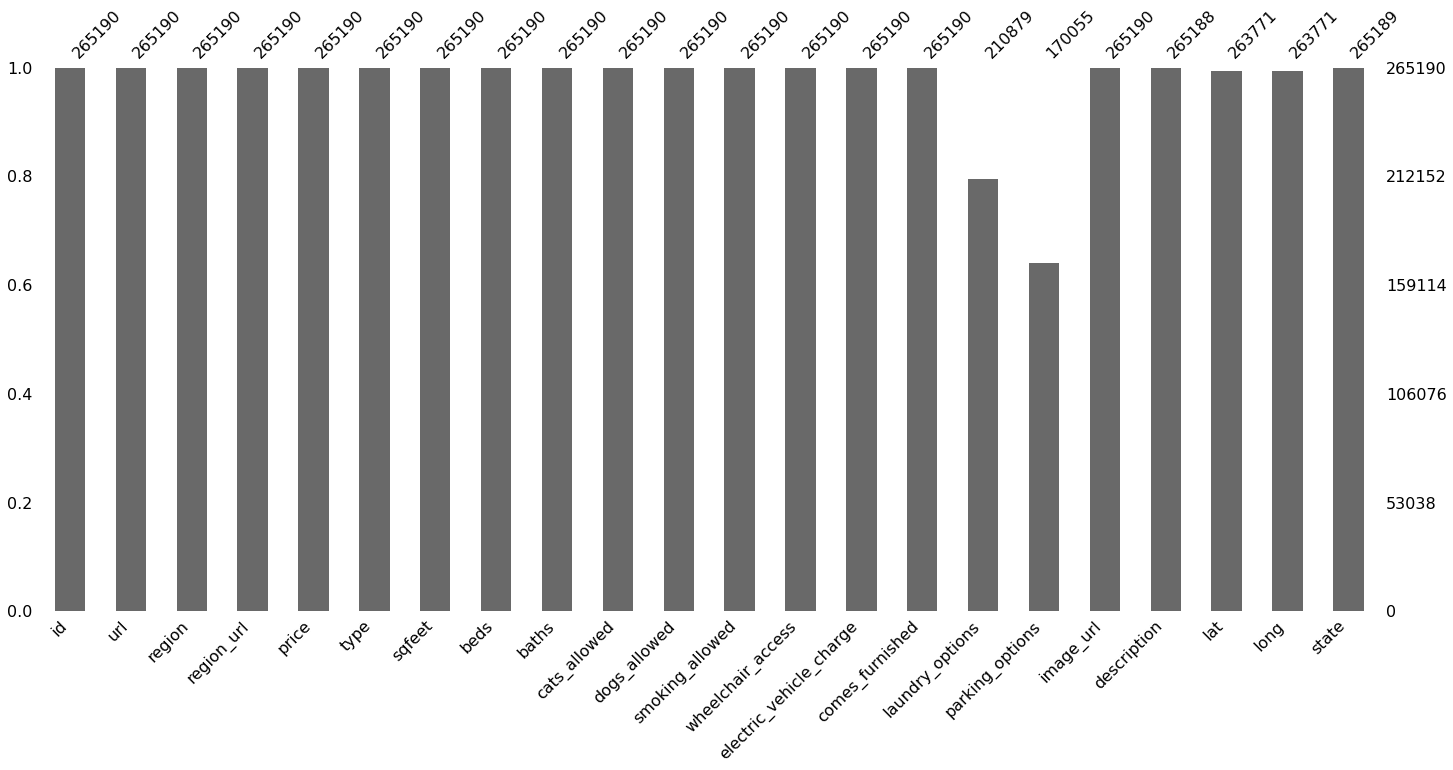

In [10]:
msno.bar(data)

The above chart didnt approximately showed us the missing values, it is more accurate to show the columns with all the values.
So we will se a matrix chart to see the missing values in columns

<AxesSubplot:>

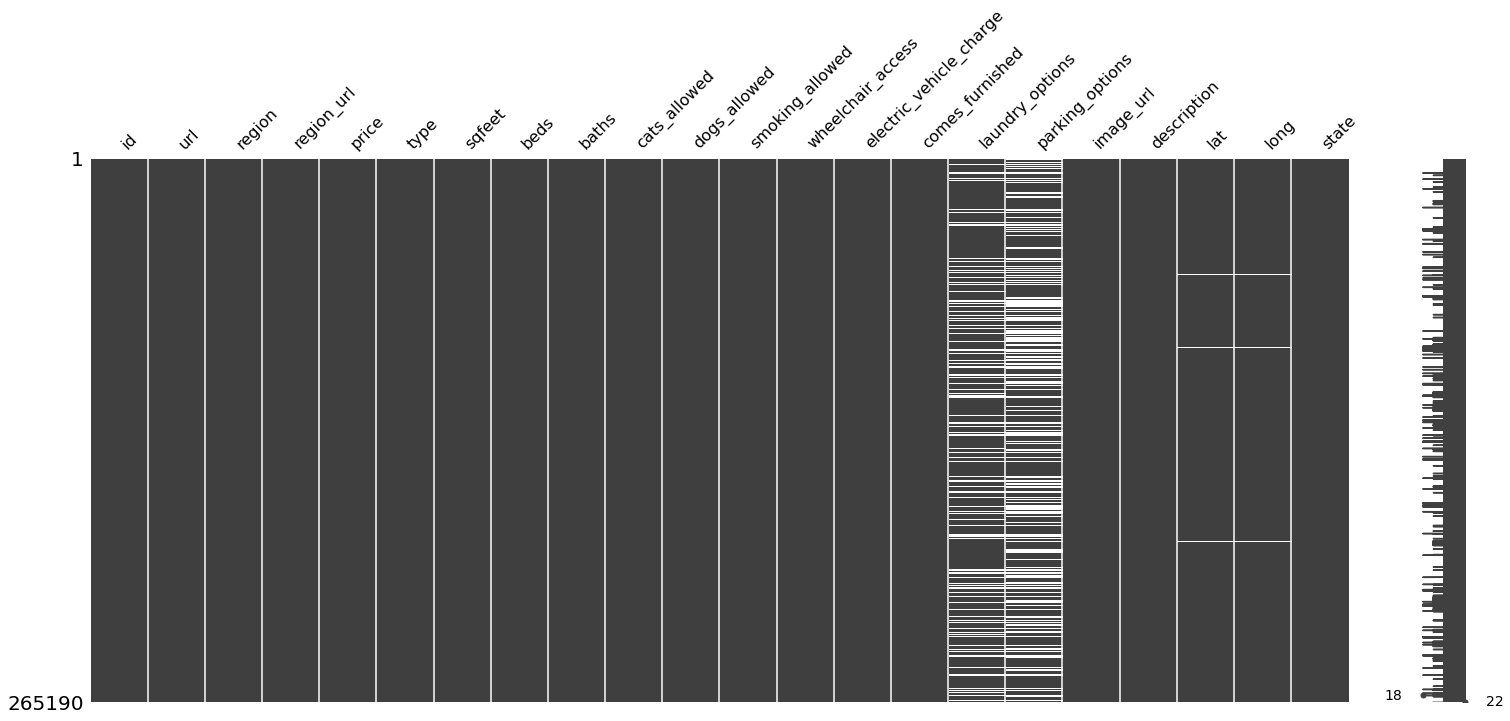

In [11]:
msno.matrix(data)

Make a list of the variables that contain missing values so that we can handle these columns

In [12]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().sum().sort_values(ascending=False)

parking_options    95135
laundry_options    54311
lat                 1419
long                1419
description            2
state                  1
dtype: int64

Our dataset contains a few variables with missing values. We need to account for this in our next steps, where we will engineer the variables for use in Machine Learning Models.

## Data Cleaning
### First we will clean the Categorical variables

Make a list of the categorical variables that contain missing values

In [13]:
catVariables = ['laundry_options', 'parking_options']

In [14]:
print("Number of Categories in: ")
for ColName in catVariables:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories in: 
laundry_options = 6
parking_options = 8


Calling a function here which replaces the missing values with mode and then creates a new column, once we have the new column we will rename it back to previous column

Function name is impute_nan_with_mode

This function will take in the dataframe and the column name for which the values have to be imputed.
It then returns the dataframe with new columns concatinated with Imputed, once we have the new columns. Then we will drop the previous catVaribales and rename the new columns to thier previous name. 

In [15]:
for Columns in catVariables:
    utility.impute_nan_with_mode(data,Columns)

In [16]:
data = data.drop(catVariables, axis = 1)

In [17]:
data.rename(columns = {'laundry_options_Imputed':'laundry_options'}, inplace = True)
data.rename(columns = {'parking_options_Imputed':'parking_options'}, inplace = True)
data.sample(5)

id                                                url  \
226733  7031971038  https://wilmington.craigslist.org/apa/d/wilmin...   
80406   7043900121  https://jacksonville.craigslist.org/apa/d/jack...   
26386   7050086688  https://losangeles.craigslist.org/sfv/apa/d/bu...   
264798  7051132307  https://columbus.craigslist.org/apa/d/columbus...   
70054   7040007286  https://delaware.craigslist.org/apa/d/wilmingt...   

              region                           region_url  price       type  \
226733    wilmington    https://wilmington.craigslist.org   1029  apartment   
80406   jacksonville  https://jacksonville.craigslist.org   1065  apartment   
26386    los angeles    https://losangeles.craigslist.org   1850  apartment   
264798      columbus      https://columbus.craigslist.org    700  apartment   
70054       delaware      https://delaware.craigslist.org   1535  apartment   

        sqfeet  beds  baths  cats_allowed  ...  wheelchair_access  \
226733     755     2    2.0             1  ...                  0   
80406     1040     2    2.0             1  ...                  0   
26386      650     2    1.0             0  ...                  0   
264798     644     1    1.0             0  ...                  0   
70054      792     1    1.0             0  ...                  0   

        electric_vehicle_charge  comes_furnished  \
226733                        0                0   
80406                         0                0   
26386                         0                0   
264798                        0                0   
70054                         0                0   

                                                image_url  \
226733  https://images.craigslist.org/01010_1P8hXnYCTm...   
80406   https://images.craigslist.org/01111_aLtKICqBkS...   
26386   https://images.craigslist.org/00Z0Z_7rhGXW0vcc...   
264798  https://images.craigslist.org/00X0X_e35vXoYbBM...   
70054   https://images.craigslist.org/01515_d5BGj6DIuP...   

                                              description      lat      long  \
226733  To schedule a tour We now book our tour appoin...  34.1572  -77.9141   
80406   Westland Park is an upscale apartment communit...  30.2043  -81.7552   
26386   This is a wonderful downstairs 2 bedroom + 1 b...  34.1679 -118.3100   
264798  Move-in within 48 of looking and get 1st month...  39.9648  -83.1260   
70054   The Residences at Harlan Flats offer luxury ap...  39.7394  -75.5578   

        state  laundry_options     parking_options  
226733     nc      w/d in unit  off-street parking  
80406      fl      w/d in unit  off-street parking  
26386      ca  laundry on site             carport  
264798     oh      w/d in unit  off-street parking  
70054      de      w/d in unit  off-street parking  

[5 rows x 22 columns]

In [18]:
data.isna().sum().sort_values(ascending=False)

long                       1419
lat                        1419
description                   2
state                         1
id                            0
url                           0
laundry_options               0
image_url                     0
comes_furnished               0
electric_vehicle_charge       0
wheelchair_access             0
smoking_allowed               0
dogs_allowed                  0
cats_allowed                  0
baths                         0
beds                          0
sqfeet                        0
type                          0
price                         0
region_url                    0
region                        0
parking_options               0
dtype: int64

Now as you can see the missing values for parking_options and laundry_options have been imputed with the mode value and now we are only left with
the missing values for longitude, latitude, description and state.
Next we will try to deal with the missing values for these.

Now making a list of numerical varibales that contain missing values.

In [19]:
numVariables = ['lat', 'long']

Here since these are the numerical values, we are simply replacing the missing values based on the mean of lat and longitude repsectively

In [20]:
for i in numVariables:
    data[i] = data[i].fillna(data[i].mean())

In [21]:
data.isna().sum().sort_values(ascending=False)

description                2
state                      1
id                         0
url                        0
laundry_options            0
long                       0
lat                        0
image_url                  0
comes_furnished            0
electric_vehicle_charge    0
wheelchair_access          0
smoking_allowed            0
dogs_allowed               0
cats_allowed               0
baths                      0
beds                       0
sqfeet                     0
type                       0
price                      0
region_url                 0
region                     0
parking_options            0
dtype: int64

Now as you can see the missing values for lat and long have been imputed with the mean value and now we are only left with the missing values for description and state. Next we will try to deal with the missing values for these.


Since the number of records are really really less for these two missing values. We can directly proceed to drop these records

In [22]:
data=data.dropna()

In [23]:
data.isna().sum().sort_values(ascending=False)

id                         0
url                        0
laundry_options            0
state                      0
long                       0
lat                        0
description                0
image_url                  0
comes_furnished            0
electric_vehicle_charge    0
wheelchair_access          0
smoking_allowed            0
dogs_allowed               0
cats_allowed               0
baths                      0
beds                       0
sqfeet                     0
type                       0
price                      0
region_url                 0
region                     0
parking_options            0
dtype: int64

Now finally our dataset is free of null values and now we can proceed with the other calculations and observations

# Some important visualizations to get to know the dataset better

This plot shows us the beds vs the number of listings with each bed count.

<AxesSubplot:xlabel='beds', ylabel='count'>

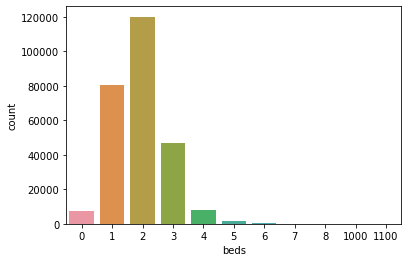

In [24]:
sns.countplot(data['beds'])

As you can see that there are certain listings which have 1000 or 1100 beds. This seems odd and looks like we have to check for outliers and fix the dataset later.

This plot shows us the beds vs the number of listings with each bath count.

<AxesSubplot:xlabel='baths', ylabel='count'>

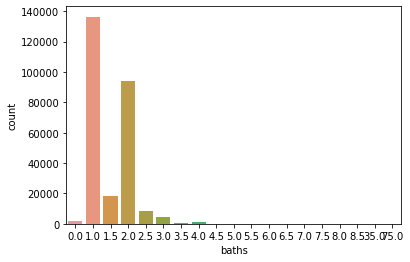

In [25]:
sns.countplot(data['baths'])

This plot is used to determine the number of furnished and unfurnished apartments. 
If it is comes out to be balanced classification then we can use it for a classfication prediction.

<AxesSubplot:xlabel='comes_furnished', ylabel='count'>

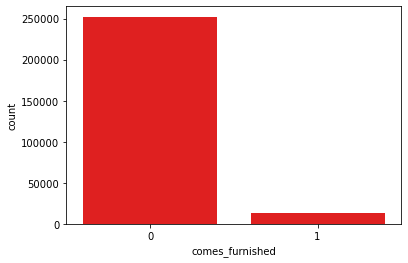

In [26]:
sns.countplot(data['comes_furnished'],color='red') 

Unfortuntely the number of listings which come furnished are way to high in comparison to number of listing which come unfurnished. 
It is unbalanced dataset. If we want we can use a classfication prediction here but it wont be able to indentify false instances as data is unbalanced

Similarly we will check for dogs_allowed and cats_allowed as well

<AxesSubplot:xlabel='dogs_allowed', ylabel='count'>

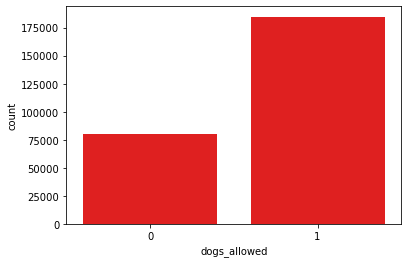

In [27]:
sns.countplot(data['dogs_allowed'], color='red')

<AxesSubplot:xlabel='cats_allowed', ylabel='count'>

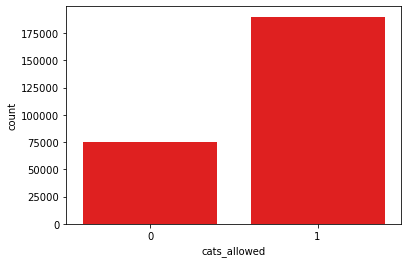

In [28]:
sns.countplot(data['cats_allowed'],color='red')

# Outliers

## Price

<AxesSubplot:xlabel='price'>

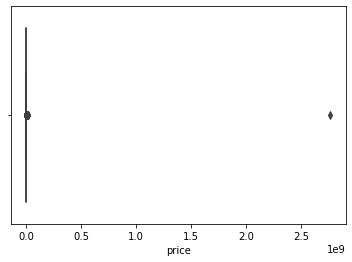

In [29]:
sns.boxplot(x=data['price'])

There are certain outliers, but it is difficult to get a proper picture of it from this plot. Let us plot it with respect to sqfeet

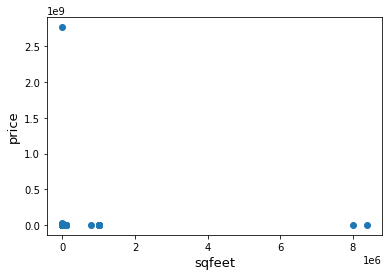

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large sqfeet that are of a low price. Also one at the top left with extremely small sqfeet that are of high price. These values are huge oultliers

Similar to how we handled the outliers for beds and baths, we will remove the outlying listings.

calculateIQR is a user defined function which helps is to identify the total number of outliers in the given column and also prints the lower bound, upper bound and IQR

In [31]:
utility.calcuateIQR(data, 'price')

The IQR is 633.0
The lower bound value is -132.5
The upper bound value is 2399.5
Total number of outliers are 13423


In [32]:
price_upper = 2400
price_lower = 1

In [33]:
print("Shape before removing outliers for price {}".format(data.shape))
data = data[(data['price'] <= price_upper) & (data['price'] >= price_lower)]
print("Shape after removing outliers for price {}".format(data.shape))

Shape before removing outliers for price (265187, 22)
Shape after removing outliers for price (251470, 22)


We have successfully removed 13423 outlying values of prices.

### sqfeet

<AxesSubplot:xlabel='sqfeet'>

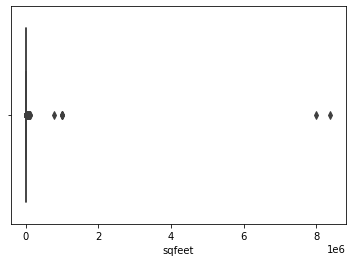

In [34]:
sns.boxplot(x=data['sqfeet'])

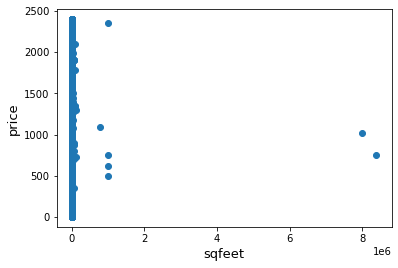

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

Again we can see some listings for which sqfeet is extremelly high but the price is low. We need to remove these values as well

calculateIQR is a user defined function which helps is to identify the total number of outliers in the given column and also prints the lower bound, upper bound and IQR

In [36]:
utility.calcuateIQR(data, 'sqfeet')

The IQR is 390.0
The lower bound value is 165.0
The upper bound value is 1725.0
Total number of outliers are 9210


In [37]:
sqfeet_upper = 1725
sqfeet_lower = 165

In [38]:
print("Shape before removing outliers for sqfeet {}".format(data.shape))
data = data[(data['sqfeet'] <= sqfeet_upper) & (data['sqfeet'] >= sqfeet_lower)]
print("Shape after removing outliers for sqfeet {}".format(data.shape))

Shape before removing outliers for sqfeet (251470, 22)
Shape after removing outliers for sqfeet (242260, 22)


### Beds and Baths

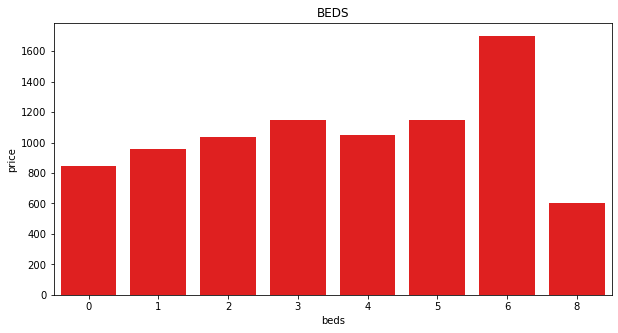

In [39]:
groupByPriceBeds = data.groupby('beds')['price'].median().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=groupByPriceBeds['beds'], y=groupByPriceBeds['price'],color='red')
plt.title('BEDS')
plt.show()

As you can see that for Beds vs Price, there are beds=0 whihc has more price than beds =8. It shows there are some outliers which we have to adjust

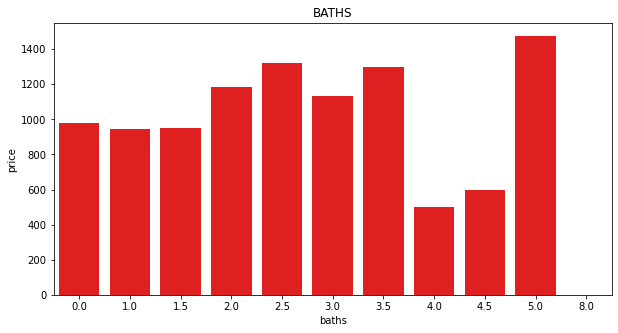

In [40]:
groupByPriceBaths = data.groupby('baths')['price'].median().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=groupByPriceBaths['baths'], y=groupByPriceBaths['price'],color='red')
plt.title('BATHS')
plt.show()

Similary for the distribution of baths, baths = 8.5 has an unusally high price. Also price is more for baths =0 then baths =1 and 1.5. We need to look
While looking at the beds we will fix the outliers for baths as well next.

### Handling the outliers for Beds and Baths

Let us visualize the outliers for Beds and Baths 

<AxesSubplot:xlabel='beds'>

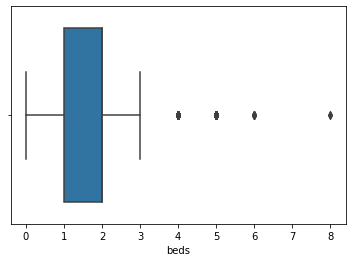

In [41]:
sns.boxplot(x=data['beds'])

It is clearly visible that there are certain outliers for beds. Let us dig deep into it

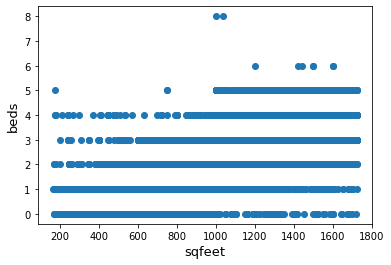

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['beds'])
plt.ylabel('beds', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

This gives us more accurate inforamtion regaridng the outlying values, it is just not possible that there are 0  bedrooms in all these squarefeet X Axis values.


calculateIQR is a user defined function which helps is to identify the total number of outliers in the given column and also prints the lower bound, upper bound and IQR


In [43]:
utility.calcuateIQR(data, 'beds')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 4493


Since beds cannot be float so from here we will take the interger value of the lower and upper bound to remove outliers.

In [44]:
beds_upper = 3
beds_lower = 1 

In [45]:
print("Shape before removing outliers for beds {}".format(data.shape))
data = data[(data['beds'] <= beds_upper) & (data['beds'] >= beds_lower)]
print("Shape after removing outliers for beds {}".format(data.shape))

Shape before removing outliers for beds (242260, 22)
Shape after removing outliers for beds (230551, 22)


We have successfully removed 4493 outlying values of beds.
Similarly now we will calucalte the same values for baths and remove the outliers. 


calculateIQR is a user defined function which helps is to identify the total number of outliers in the given column and also prints the lower bound, upper bound and IQR

In [46]:
utility.calcuateIQR(data, 'baths')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 32


Since baths cannot be float so from here we will take the interger value of the lower and upper bound to remove outliers.

In [47]:
baths_upper = 3
baths_lower = 1

In [48]:
print("Shape before removing outliers for baths {}".format(data.shape))
data = data[(data['baths'] <= baths_upper) & (data['baths'] >= baths_lower)]
print("Shape after removing outliers for baths {}".format(data.shape))

Shape before removing outliers for baths (230551, 22)
Shape after removing outliers for baths (228608, 22)


We have successfully removed 32 outlying values of beds. Similarly now we will calucalte the same values for baths and remove the outliers.

Now are data is free of any null values and also there is no outliers as well.
Let me just quickly plot a graph to check if there are any missing values or not. 


<AxesSubplot:>

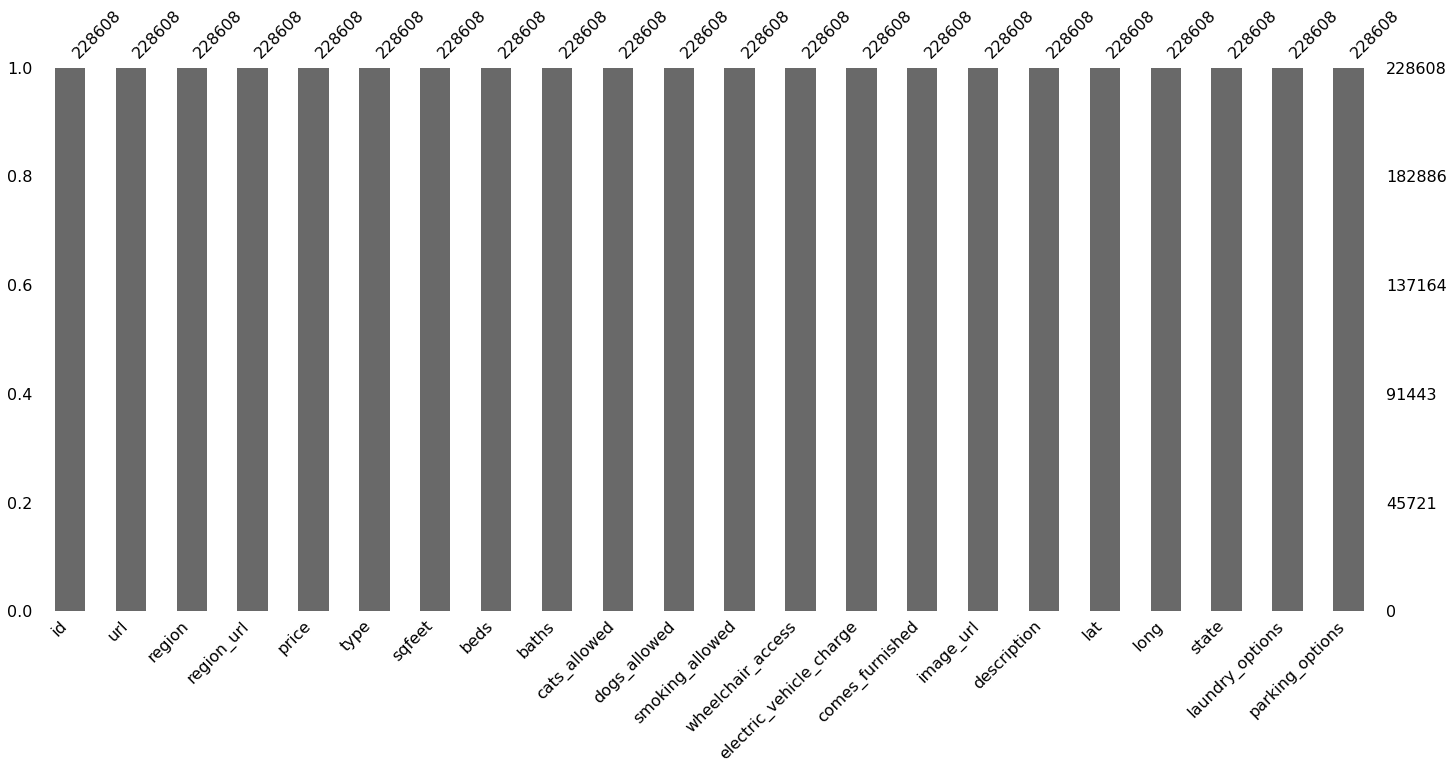

In [49]:
msno.bar(data)

#### As expected there is no missing data 
Let us now proceed to the next step and check for correaltion in our dataset

### Correlation

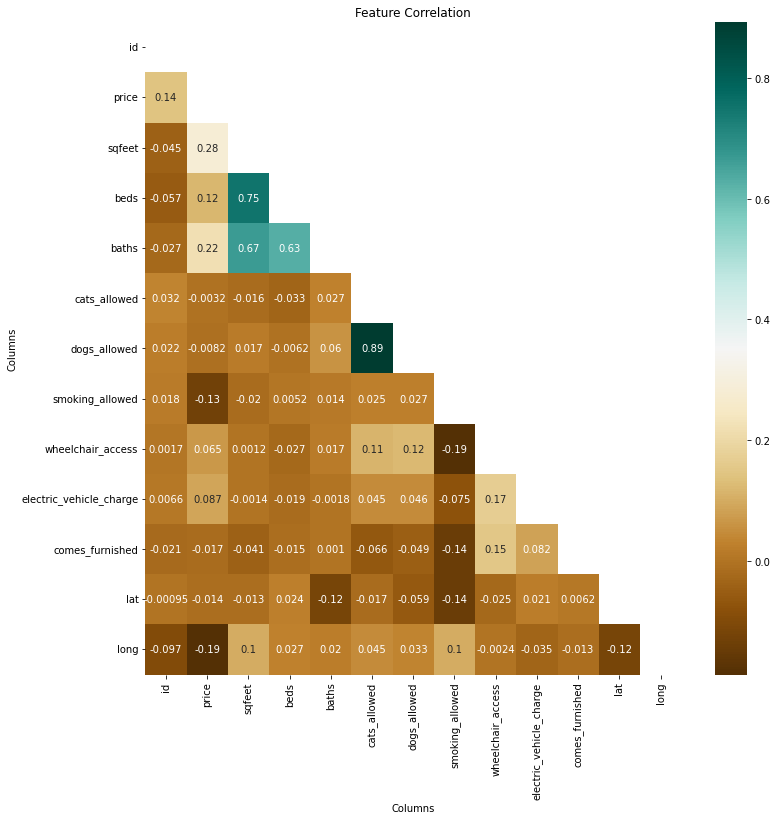

In [50]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(12,12)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            mask=mask,
            ax=ax, 
            cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

There's hardly any correlation among the independent and dependent features ie between the other features and price(TARGET).

Some insights from the above correlation heatmap:

    1.Expected strong correlation between beds and baths.
    2.Expected strong correlation between beds, baths and sqfeet.
    3.Expected strong correlation between cats_allowed and dogs_allowed.

## Creating new features to explore our dataset more and to get some correlation with respect to price (Target Variable)

In [51]:
data.head(2)

id                                                url      region  \
1  7041970863  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   
2  7041966914  https://bham.craigslist.org/apa/d/birmingham-g...  birmingham   

                    region_url  price       type  sqfeet  beds  baths  \
1  https://bham.craigslist.org   1120  apartment    1319     3    2.0   
2  https://bham.craigslist.org    825  apartment    1133     1    1.5   

   cats_allowed  ...  wheelchair_access  electric_vehicle_charge  \
1             1  ...                  0                        0   
2             1  ...                  0                        0   

   comes_furnished                                          image_url  \
1                0  https://images.craigslist.org/00707_uRrY9CsNMC...   
2                0  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   

                                         description      lat     long  state  \
1  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045     al   
2  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al   

   laundry_options     parking_options  
1  laundry on site  off-street parking  
2  laundry on site      street parking  

[2 rows x 22 columns]

In [52]:
data['pets_allowed'] = np.where((data['cats_allowed']==1)&data['dogs_allowed']==1,1,0)
data['premium_house'] = np.where((data['baths']>=data['beds'])&(data['beds']>1),1,0)
data['beds_per_sqfeet'] = data['beds'] / data['sqfeet']
data['baths_per_beds'] = data['baths'] / data['beds']

In [53]:
data.sample(2)

id                                                url  \
242382  7032799753  https://albuquerque.craigslist.org/apa/d/albuq...   
18883   7044650402  https://bakersfield.craigslist.org/apa/d/baker...   

             region                          region_url  price       type  \
242382  albuquerque  https://albuquerque.craigslist.org    770  apartment   
18883   bakersfield  https://bakersfield.craigslist.org   1250  apartment   

        sqfeet  beds  baths  cats_allowed  ...  \
242382     706     1    1.0             1  ...   
18883      725     1    1.0             0  ...   

                                              description      lat     long  \
242382  Come tour our Beautifully Improved, and Remode...  35.1347 -106.643   
18883   Watermark  Apartments in Bakersfield, CA Post ...  35.3105 -119.092   

        state  laundry_options     parking_options pets_allowed  \
242382     nm      w/d in unit  off-street parking            1   
18883      ca      w/d in unit  off-street parking            0   

        premium_house  beds_per_sqfeet baths_per_beds  
242382              0         0.001416            1.0  
18883               0         0.001379            1.0  

[2 rows x 26 columns]

#### Exploring 'description' column

AS we can see that there is a huge description provided about each lisitng, important imformation like school near by or gym near by is provided in the description. Let me evaluate this feature and try to create more features with respect to it.

In [54]:
data.description[2]

'Apartments In Birmingham AL Welcome to 100 Inverness Apartment Homes, a luxury apartment community tucked away into one of the most coveted locations in the city for Birmingham apartments. Find stylish one-, two-, and three-bedroom apartment floor plans tailored to your wants and needs, complete with the amenities that are important to you. Our layouts come with just enough variety to enable you to make it your own haven unlike any other. Get inspired by our photos and the serenity of the nature surrounding you to let your aesthetic come together with our stylish, modern designs for a home you wonâ\x80\x99t be able to wait to show off to your guests. Even beyond style, our pet-friendly apartment community is also all about functionality! Some of our homes come with washer and dryer hookups, wood burning fireplaces, hardwood floors, and a private patio or balcony. All of our residents can make use of oversized walk-in closets, air conditioning, garages, a business center, on-site manag

In [55]:
[x in data.description[2].lower() for x in ['pool', 'swimming','wi-fi','fireplace','grilling','gym','fence', 'court']]

[True, False, False, True, True, True, False, True]

As we can see that in the above instance, pool is mentioned in the description and so as fireplace, court and etc. 
I think we can create categorical variables out of this and create new features for our dataset


Here I am calling different functions with vectorize which will create new columns based on if certain substring is in the description column. For example if substring 'pool' or 'swimming' is present in the description. Then the function has_pool will return 1 else 0. And then with vectorize I am creating the new columns.

In [56]:
data['has_pool']=np.vectorize(utility.has_pool)(data['description'])
data['has_grill']=np.vectorize(utility.has_grill)(data['description'])
data['has_fireplace']=np.vectorize(utility.has_fireplace)(data['description'])
data['has_gymNearBy']=np.vectorize(utility.has_gymNearBy)(data['description'])
data['schoolCollegeNearBy']=np.vectorize(utility.schoolCollegeNearBy)(data['description'])
data['wifiFacilities']=np.vectorize(utility.wifiFacilities)(data['description'])
data['valetService']=np.vectorize(utility.valetService)(data['description'])
data['shoppingNearBy']=np.vectorize(utility.shoppingNearBy)(data['description'])
data['sportsPlaygroundNearBy']=np.vectorize(utility.sportsPlaygroundNearBy)(data['description'])
data['diningNearBy']=np.vectorize(utility.diningNearBy)(data['description'])

In [57]:
data.columns
data.sample(2)

id                                                url  \
44337  7049990731  https://sfbay.craigslist.org/eby/apa/d/dublin-...   
86811  7049071870  https://orlando.craigslist.org/apa/d/kissimmee...   

            region                      region_url  price       type  sqfeet  \
44337  SF bay area    https://sfbay.craigslist.org   2155  apartment     657   
86811      orlando  https://orlando.craigslist.org   1364  apartment     752   

       beds  baths  cats_allowed  ...  has_pool  has_grill  has_fireplace  \
44337     1    1.0             1  ...         1          0              0   
86811     1    1.0             1  ...         0          1              0   

       has_gymNearBy  schoolCollegeNearBy wifiFacilities valetService  \
44337              1                    0              1            0   
86811              0                    0              1            0   

       shoppingNearBy  sportsPlaygroundNearBy diningNearBy  
44337               1                       0            1  
86811               0                       0            0  

[2 rows x 36 columns]

### Creating a subset of the entire Dataset
Till now we were working on the entire dataset and we will use the entire dataset to predict the price of the apartment. Now for our use later we will create a subset of the cleaned dataset which only contains the Top 5 Regions.
We will use this subset of data later.

According to Bloomberg (2016, Florida), the top five cities with the largest college students are:-
   
    1.New York City 
    2.Los Angeles 
    3.Chicago 
    4.Boston
    5.Atlanta. 
    
So we decided to extract the data which only consists of the regions mentioned above and go ahead with this subset of data to make the next predictions and classifications. Moreover, we also added some extension predictors utilized from the description data field that we believed could be useful for our prediction, including pool, grill, fireplace, gym, school nearby, wifi, etc. Next, let's visualize this subset of data and draw out some meaningful conclusions to use further


In [58]:
#Select only the top five cities that has the most university(according to Bloomberg) and baths and beds more than or equal to 1
datasubset = data[(data['region'].str.contains('chicago|los angeles|new york city|atlanta|boston'))]
datasubset = datasubset[['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access', 
             'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options','lat', 'long', 
             'premium_house', 'pets_allowed', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool', 'has_grill', 
             'has_fireplace', 'has_gymNearBy', 'schoolCollegeNearBy', 'wifiFacilities', 'valetService', 
             'shoppingNearBy', 'sportsPlaygroundNearBy', 'diningNearBy','beds', 'baths', 'cats_allowed', 'dogs_allowed']]

In [59]:
datasubset['region'].unique()

array(['los angeles', 'atlanta', 'chicago', 'boston', 'new york city'],
      dtype=object)

# Categorical variables
Now that we have created the datasubset, we will continue our work on the full dataset.
As we know that Machine Learning models work better with categorial values. So now we will make the values categorical and remove the irrelavent features from our dataset.

Make a list of the categorical variables that contain missing values

In [60]:
categoricalVariables = [var for var in data.columns if data[var].dtypes == 'O']
categoricalVariables

['url',
 'region',
 'region_url',
 'type',
 'image_url',
 'description',
 'state',
 'laundry_options',
 'parking_options']

Let's visualise the values of the categorical variables

In [61]:
data[categoricalVariables].head()

url      region  \
1  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   
2  https://bham.craigslist.org/apa/d/birmingham-g...  birmingham   
3  https://bham.craigslist.org/apa/d/birmingham-f...  birmingham   
4  https://bham.craigslist.org/apa/d/birmingham-2...  birmingham   
5  https://bham.craigslist.org/apa/d/birmingham-s...  birmingham   

                    region_url       type  \
1  https://bham.craigslist.org  apartment   
2  https://bham.craigslist.org  apartment   
3  https://bham.craigslist.org  apartment   
4  https://bham.craigslist.org  apartment   
5  https://bham.craigslist.org  apartment   

                                           image_url  \
1  https://images.craigslist.org/00707_uRrY9CsNMC...   
2  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4  https://images.craigslist.org/00y0y_21c0FOvUXm...   
5  https://images.craigslist.org/00606_g79izH5xxk...   

                                         description state  laundry_options  \
1  Find Your Way to Haven Apartment Homes Come ho...    al  laundry on site   
2  Apartments In Birmingham AL Welcome to 100 Inv...    al  laundry on site   
3  Apartments In Birmingham AL Welcome to 100 Inv...    al  laundry on site   
4  Apartments In Birmingham AL Welcome to 100 Inv...    al  laundry on site   
5  Apartments In Birmingham AL Welcome to 100 Inv...    al  laundry on site   

      parking_options  
1  off-street parking  
2      street parking  
3      street parking  
4      street parking  
5      street parking

### Let's evaluate how many different categories are present in each of the variables.

In [62]:
data[categoricalVariables].nunique().sort_values(ascending=False)

url                228608
description        166494
image_url          103125
region_url            305
region                298
state                  38
type                   12
parking_options         7
laundry_options         5
dtype: int64

Variables like url, image_url, description has high cardinality. It is worth mentioning that each of houses may have differt values for these variables. Hence the high cardinality. So it okay to remove these. Also region_url contains the region, so dropping region_url will not affect our model.

In [63]:
categoricalVariables = [var for var in categoricalVariables if var not in ['url', 'image_url', 'description', 'region_url']]

All the categorical variables show low number of unique lables(except region), this means that they have only few different labels.

Let us now analze these variables and decide how to deal with these.

# Type

## Pie Plot

In [64]:
groupByType = data.groupby(["type"])[["price"]].median().reset_index()

fig = px.pie(groupByType,
             values="price",
             names="type",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# state

In [65]:
data['state'].value_counts().sort_values(ascending=False)

fl    28496
ca    23921
nc    17417
mi    13129
ga    13024
co     9763
il     8051
ny     7864
md     6856
ia     6833
la     6713
ks     6647
mn     6570
az     5959
oh     5935
in     5882
al     5704
ky     4952
nj     4543
ms     4539
id     3839
ma     3722
nd     3280
ct     3056
ar     2881
nv     2569
ne     2481
nm     2373
ak     1883
mo     1847
dc     1836
de     1832
nh     1567
hi     1126
mt     1098
me      339
ok       47
or       34
Name: state, dtype: int64

#### Categorical variables
Removing rare labels 

First, we will group those categories within variables that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".


To find these rare varibales I have defined a fucntion which will take these cateforical variables one by one and will return the values which are present less than 1% of the times in the dataset.

In [66]:
for var in categoricalVariables:
    print(utility.findRareLabels(data, var, 0.01))
    print()

region
SF bay area               0.003031
akron / canton            0.006054
albany                    0.008298
albuquerque               0.007834
ames                      0.001404
                            ...   
winston-salem             0.008840
worcester / central MA    0.005485
yuba-sutter               0.000538
yuma                      0.000844
zanesville / cambridge    0.000009
Name: price, Length: 286, dtype: float64

type
assisted living    0.000004
cottage/cabin      0.002178
flat               0.001168
in-law             0.000477
land               0.000009
loft               0.001785
Name: price, dtype: float64

state
ak    0.008237
dc    0.008031
de    0.008014
hi    0.004925
me    0.001483
mo    0.008079
mt    0.004803
nh    0.006855
ok    0.000206
or    0.000149
Name: price, dtype: float64

laundry_options
no laundry on site    0.00923
Name: price, dtype: float64

parking_options
no parking       0.007528
valet parking    0.000315
Name: price, dtype: float64



Now that we have the rare labels, we will similarly find the most frequent labels. So that we can later filter the datasert accordingly

In [67]:
frequent_labels = {}
for var in categoricalVariables:
    frequent_labels[var] = utility.findFrequentLabels(data, var, 0.01)
    
frequent_labels

{'region': array(['augusta', 'colorado springs', 'fayetteville',
        'fort collins / north CO', 'jackson', 'jacksonville', 'lincoln',
        'omaha / council bluffs', 'orlando', 'rochester',
        'savannah / hinesville', 'stockton'], dtype=object),
 'type': array(['apartment', 'condo', 'duplex', 'house', 'manufactured',
        'townhouse'], dtype=object),
 'state': array(['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il',
        'in', 'ks', 'ky', 'la', 'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd',
        'ne', 'nj', 'nm', 'nv', 'ny', 'oh'], dtype=object),
 'laundry_options': array(['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],
       dtype=object),
 'parking_options': array(['attached garage', 'carport', 'detached garage',
        'off-street parking', 'street parking'], dtype=object)}

In [68]:
for var in categoricalVariables:
    data[var] = np.where(data[var].isin(frequent_labels[var]), data[var], 'Rare')

Here I am using a user defined function which will replace each of the categorical variables with numerical values.
This function will assign discrete values to the strings of the variables, so that the smaller value corresponds to the category that shows the smaller mean house sale price.
The main purpose of this function is encoding the values.

In [69]:
for var in categoricalVariables:
    utility.repalceCategoricalWithNumerical(data, var, 'price')

In [70]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'image_url', 'description', 'lat', 'long', 'state', 'laundry_options',
       'parking_options', 'pets_allowed', 'premium_house', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'has_gymNearBy', 'schoolCollegeNearBy', 'wifiFacilities',
       'valetService', 'shoppingNearBy', 'sportsPlaygroundNearBy',
       'diningNearBy'],
      dtype='object')

#### Numerical variable transformation
We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models in thier performance.

In [71]:
for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet']:
    data[var] = np.log(data[var])

Now that we have our final dataset ready. Now I am defining the features I will be using in the prediction. The features are listed in the list below

In [72]:
features = ['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access', 
            'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options','lat', 'long', 
            'premium_house', 'pets_allowed', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool', 'has_grill', 
            'has_fireplace', 'has_gymNearBy', 'schoolCollegeNearBy', 'wifiFacilities', 'valetService', 
            'shoppingNearBy', 'sportsPlaygroundNearBy', 'diningNearBy']

data = data[features].copy()

In [73]:
for feature in features:
    data[feature] = data[feature].astype(np.float64)

# Correlation Heatmap

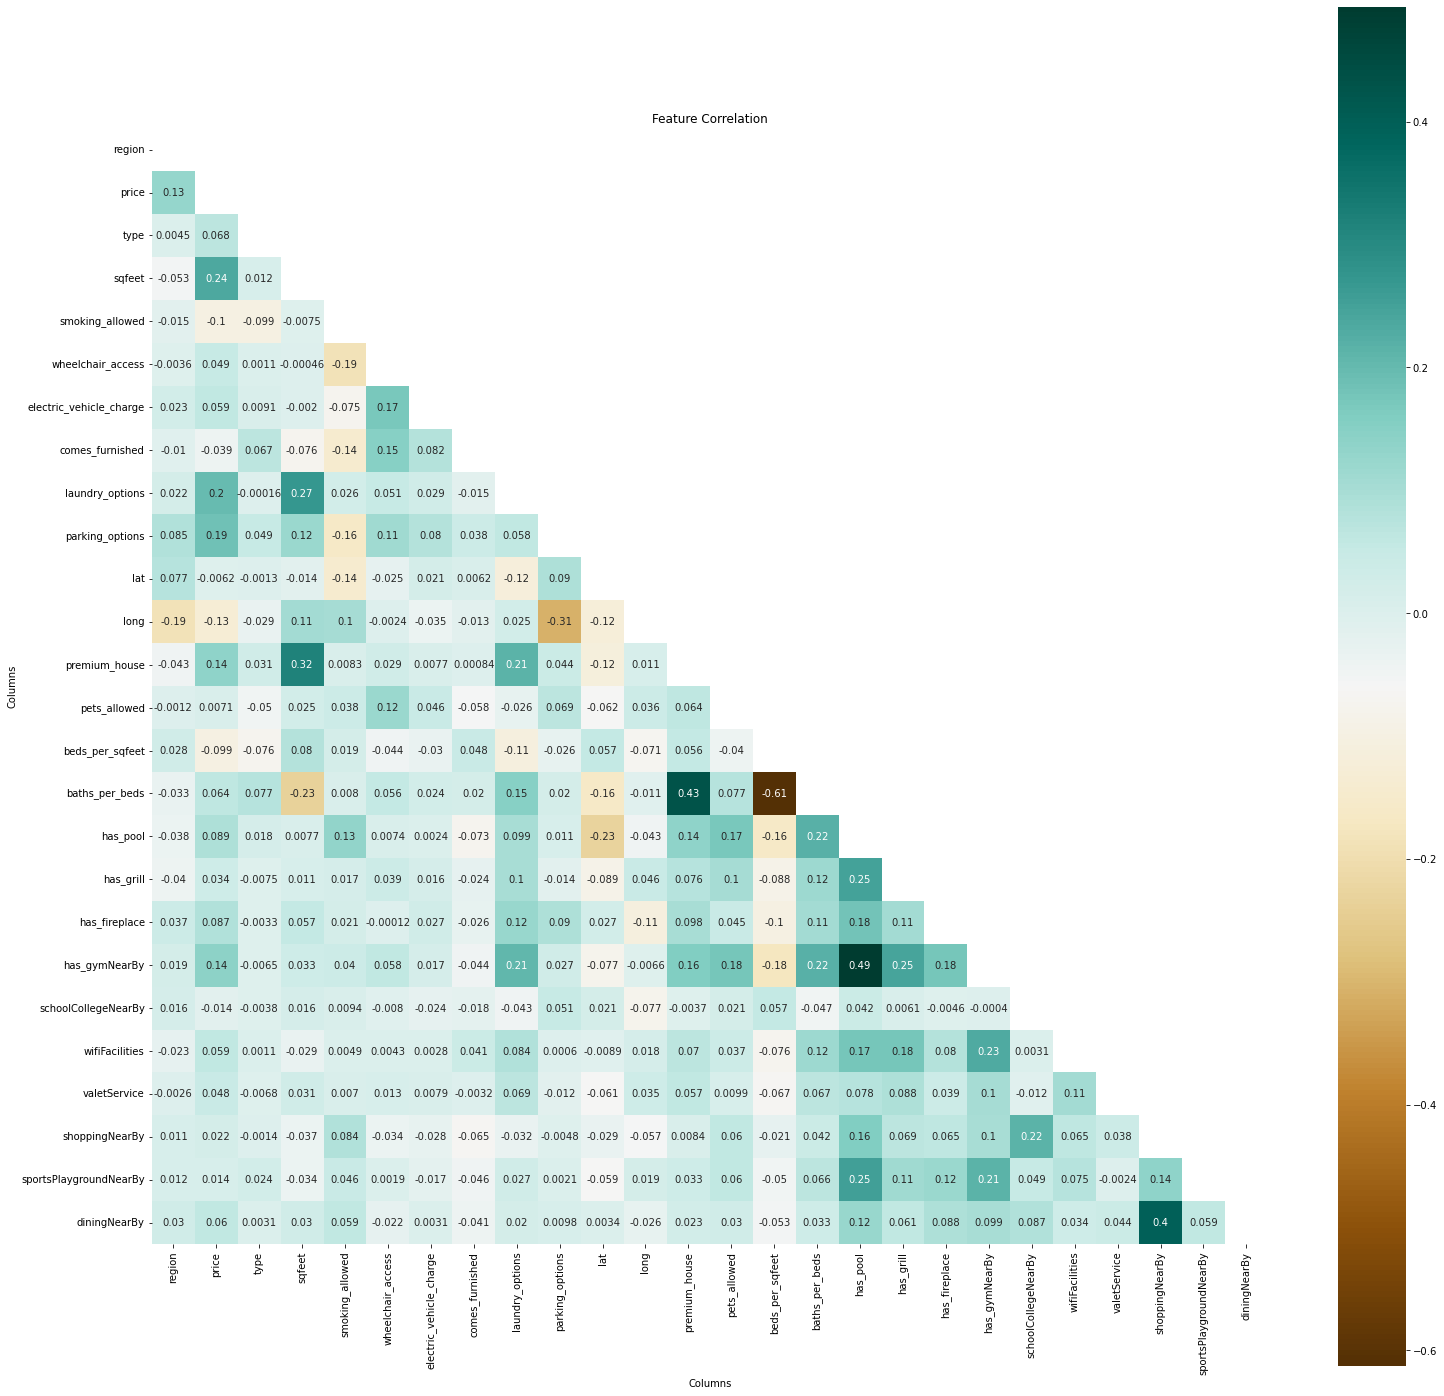

In [74]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(25,25)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            square=True,
            fmt='.2g',
            mask=mask,
            ax=ax,
           cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Model Building 

In [75]:
data.head()

region     price  type    sqfeet  smoking_allowed  wheelchair_access  \
1     8.0  7.021084   2.0  7.184629              1.0                0.0   
2     8.0  6.715383   2.0  7.032624              1.0                0.0   
3     8.0  6.684612   2.0  6.831954              1.0                0.0   
4     8.0  6.665684   2.0  6.953684              1.0                0.0   
5     8.0  6.802395   2.0  7.168580              1.0                0.0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
1                      0.0              0.0              2.0              0.0   
2                      0.0              0.0              2.0              1.0   
3                      0.0              0.0              2.0              1.0   
4                      0.0              0.0              2.0              1.0   
5                      0.0              0.0              2.0              1.0   

   ...  has_pool  has_grill  has_fireplace  has_gymNearBy  \
1  ...       0.0        0.0            0.0            0.0   
2  ...       1.0        1.0            1.0            1.0   
3  ...       1.0        1.0            1.0            1.0   
4  ...       1.0        1.0            1.0            1.0   
5  ...       1.0        1.0            1.0            0.0   

   schoolCollegeNearBy  wifiFacilities  valetService  shoppingNearBy  \
1                  1.0             0.0           0.0             1.0   
2                  1.0             0.0           1.0             1.0   
3                  1.0             0.0           1.0             1.0   
4                  1.0             0.0           1.0             1.0   
5                  1.0             0.0           1.0             1.0   

   sportsPlaygroundNearBy  diningNearBy  
1                     0.0           0.0  
2                     1.0           1.0  
3                     1.0           1.0  
4                     1.0           1.0  
5                     1.0           1.0  

[5 rows x 26 columns]

## Split Dataset without Scaling

In [76]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Split Dataset with Scaling

In [77]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

# Linear Regression
From our analysis above, we can see that most features do not have a linear relationship with our target (price), yet we will try linear regression, and use the result as a reference (other methods should have better results).

## Model Training

### Evaluation

Here I am calling a function predictRegressor which takes in the model in which we have to make the prediction and the 8 test and train variables. 

4 of these variables are Without Scaling 
And the remaning 4 are with Scaling



Trained model without scaling in 0.0630 seconds
Made predictions for without scaling dataset in 0.0035 seconds.

All features, No scaling:
MAE: 0.2578871451206945
RMSE: 0.4530316962432089
R2_Score:  0.15714069282123355
Trained model with scaling in 0.0540 seconds
Made predictions for with scaling dataset in 0.0020 seconds.

All features, with scaling:
MAE: 0.25788332777496686
RMSE: 0.45303182008157866
R2_Score:  0.15714023202196647


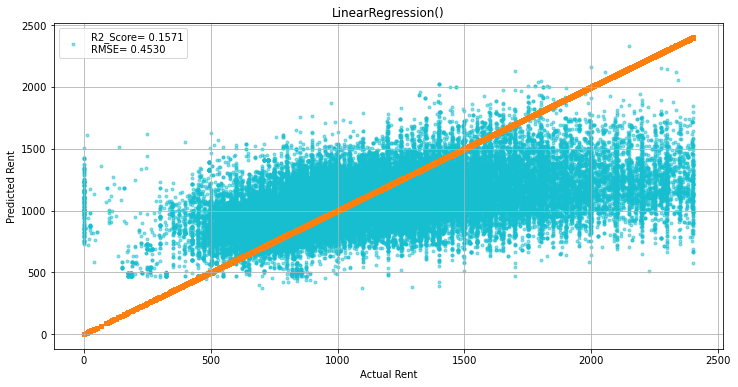

In [78]:
utility.predictRegressor(LinearRegression(),X_train, X_test, y_train, y_test, X2_train, y2_train, X2_test, y2_test)

The orange line in the graph represents the actual rents. And the cyan circles plotted against actual rents, on the x-axis, are the predicted rents.

Linear Model worked terribly, which was expected as there were no linear relationship among the features. Feature scaling has a small positive effect on LR's prediction performance.

# Random Forest



### Evaluation

Here I am calling a function predictRegressor which takes in the model in which we have to make the prediction and the 8 test and train variables. 

4 of these variables are Without Scaling 
And the remaning 4 are with Scaling



Trained model without scaling in 68.2369 seconds
Made predictions for without scaling dataset in 2.3351 seconds.

All features, No scaling:
MAE: 0.06022313594554357
RMSE: 0.18104365383742288
R2_Score:  0.8653939679883912
Trained model with scaling in 67.3082 seconds
Made predictions for with scaling dataset in 2.2147 seconds.

All features, with scaling:
MAE: 0.09719129922326776
RMSE: 0.2810677891419292
R2_Score:  0.6755707032246209


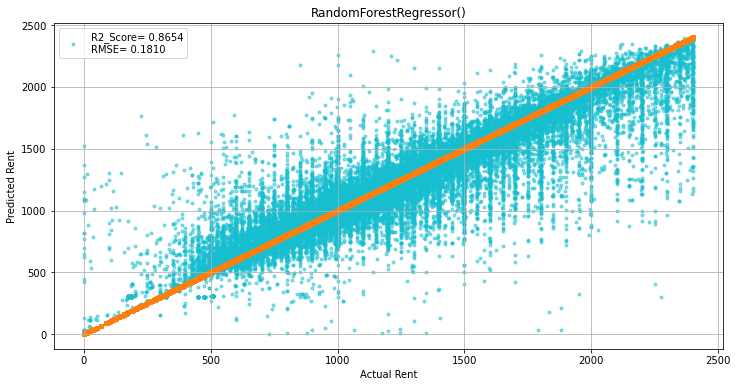

In [79]:
utility.predictRegressor(RandomForestRegressor(),X_train, X_test, y_train, y_test, X2_train, y2_train, X2_test, y2_test)

## XGBRegressor with default parameters 

### Evaluation

Here I am calling a function predictRegressor which takes in the model in which we have to make the prediction and the 8 test and train variables. 

4 of these variables are Without Scaling 
And the remaning 4 are with Scaling



Trained model without scaling in 3.6028 seconds
Made predictions for without scaling dataset in 0.0195 seconds.

All features, No scaling:
MAE: 0.10969046495369919
RMSE: 0.20807036568998882
R2_Score:  0.8222054799929566
Trained model with scaling in 2.2344 seconds
Made predictions for with scaling dataset in 0.0190 seconds.

All features, with scaling:
MAE: 0.13500585245574176
RMSE: 0.32738453753156144
R2_Score:  0.5598362860560904


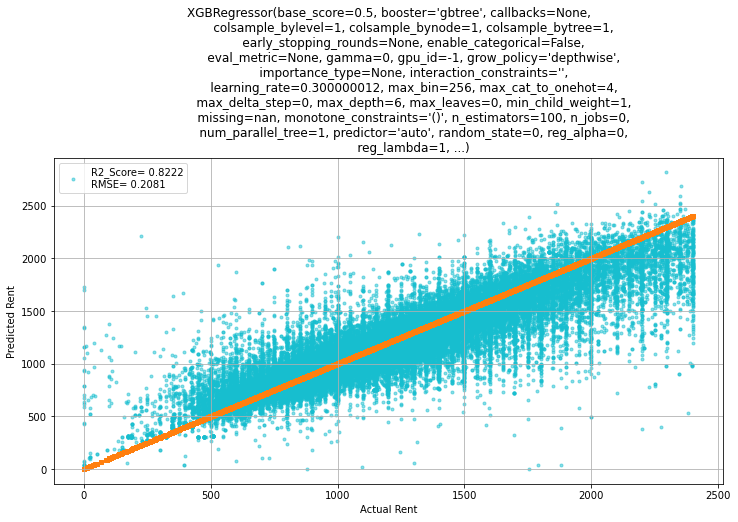

In [80]:
utility.predictRegressor(XGBRegressor(),X_train, X_test, y_train, y_test, X2_train, y2_train, X2_test, y2_test)

### XGBRegressor with custom parameters


Here I am calling a function predictRegressor which takes in the model in which we have to make the prediction and the 8 test and train variables. 

4 of these variables are Without Scaling 
And the remaning 4 are with Scaling



[22:50:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Trained model without scaling in 1.1942 seconds
Made predictions for without scaling dataset in 0.0120 seconds.

All features, No scaling:
MAE: 0.175963587772829
RMSE: 0.3338854938274252
R2_Score:  0.5421818439741442
[22:50:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parame

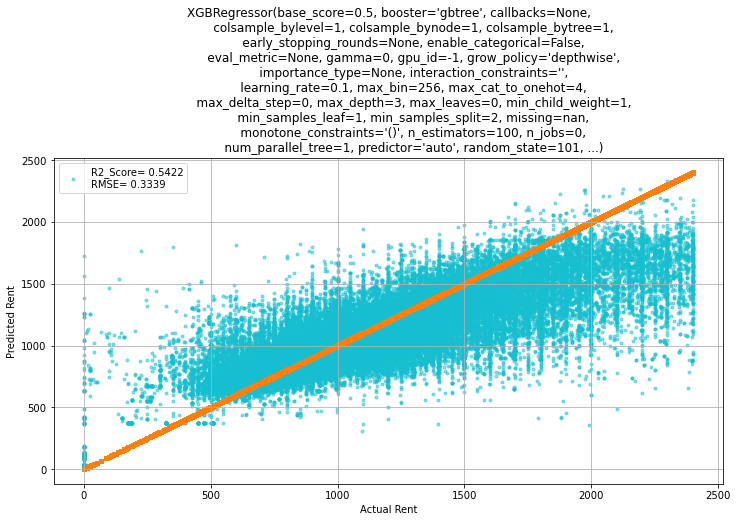

In [81]:
utility.predictRegressor(XGBRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, subsample=1.0, random_state=101),X_train, X_test, y_train, y_test, X2_train, y2_train, X2_test, y2_test)

# Observation 
Till now we used house rent dataset to build a monthly rent predictor using 3 different learning regressors (Linear Regression, Random Forest and XGB Regressor)  were tested, and we have acheived the best prediction performance using Random Forest while Linear Regression, acheived the worst performance of the 3.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

    1.Mean Absolute Error (MAE): 0.0060 
    2.Root mean squared error (RMSE): 0.180 
    3.R-squared Score (R2_Score): 0.8677

# Using the datasubset we created earlier
#### Till now we were working on the entire dataset and predicted the price of the apartment on the entire dataset. Now we will use the datasubset we created earlier and will perform Logistic Regression and Random Forest Classification on that data.

In [82]:
data=datasubset

In [83]:
data['region'].unique()

array(['los angeles', 'atlanta', 'chicago', 'boston', 'new york city'],
      dtype=object)

### Encoding Categorical Variables
As you can see that we have some categorical variables, so we will encode these varibales using custom built functions.

We have defined these functions in the utility file and we are directly calling them here.
We are using the vectorize function to avoid using loops


In [84]:
data['laundry_options'] = np.vectorize(utility.encode_laundry)(data['laundry_options'])
data['parking_options'] = np.vectorize(utility.encode_garage)(data['parking_options'])
data['type'] = np.vectorize(utility.encode_type)(data['type'])
data['region'] = np.vectorize(utility.encode_region)(data['region'])

# Logistic Regression

In [85]:
data.sample(2)

region  price  type  sqfeet  smoking_allowed  wheelchair_access  \
126744       3   1500     1     900                1                  0   
125942       3   1410     1    1025                1                  0   

        electric_vehicle_charge  comes_furnished  laundry_options  \
126744                        0                1                1   
125942                        0                0                1   

        parking_options  ...  schoolCollegeNearBy  wifiFacilities  \
126744                0  ...                    0               0   
125942                0  ...                    0               1   

        valetService  shoppingNearBy  sportsPlaygroundNearBy  diningNearBy  \
126744             0               0                       0             0   
125942             0               0                       1             0   

        beds  baths  cats_allowed  dogs_allowed  
126744     2    1.0             1             1  
125942     2    2.0             1             1  

[2 rows x 30 columns]

#### Creating a copy of the dataset as we will be using different columns in Logistic Regression

In [86]:
dataForRandomForest=data
dataForLogisticRegression = data[['type','region','price','beds','baths','laundry_options', 'parking_options', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']]
dataForLogisticRegression.sample(2)

type  region  price  beds  baths  laundry_options  parking_options  \
106093     1       4   1265     2    2.0                1                0   
171841     1       0   1815     2    1.0                1                0   

        cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
106093             1             1                1                  0   
171841             1             1                1                  0   

        electric_vehicle_charge  comes_furnished  
106093                        0                0  
171841                        0                0

In our new subset of data. We decided to evaluate how the boolean data is distributed. So here it is a plot of all the boolean variables from the dataset where 0 represents the house type and 1 represents the apartment type.

[Text(0.5, 1.0, 'comes_furnished'), Text(0.5, 0, '')]

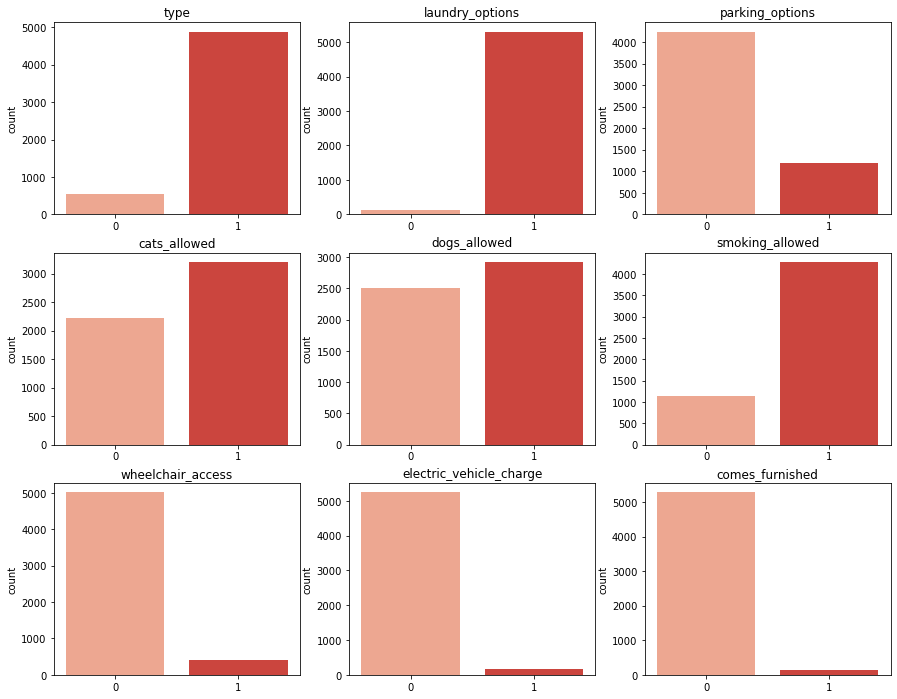

In [87]:
# Histogram count 
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
sns.countplot(ax=axes[0,0],data = dataForLogisticRegression, x = 'type', palette = "Reds")
axes[0,0].set(title = 'type', xlabel=None)
sns.countplot(ax=axes[0,1],data = dataForLogisticRegression, x = 'laundry_options', palette = 'Reds')
axes[0,1].set(title = 'laundry_options', xlabel=None)
sns.countplot(ax=axes[0,2],data = dataForLogisticRegression, x = 'parking_options', palette = "Reds")
axes[0,2].set(title = 'parking_options', xlabel=None)
sns.countplot(ax=axes[1,0],data = dataForLogisticRegression, x = 'cats_allowed', palette = "Reds")
axes[1,0].set(title ='cats_allowed', xlabel=None)
sns.countplot(ax=axes[1,1],data = dataForLogisticRegression, x = 'dogs_allowed', palette = "Reds")
axes[1,1].set(title ='dogs_allowed', xlabel=None)
sns.countplot(ax=axes[1,2],data = dataForLogisticRegression, x = 'smoking_allowed', palette = "Reds")
axes[1,2].set(title ='smoking_allowed', xlabel=None)
sns.countplot(ax=axes[2,0],data = dataForLogisticRegression, x = 'wheelchair_access', palette = "Reds")
axes[2,0].set(title ='wheelchair_access', xlabel=None)
sns.countplot(ax=axes[2,1],data = dataForLogisticRegression, x = 'electric_vehicle_charge', palette = "Reds")
axes[2,1].set(title ='electric_vehicle_charge', xlabel=None)
sns.countplot(ax=axes[2,2],data = dataForLogisticRegression, x = 'comes_furnished', palette = "Reds")
axes[2,2].set(title ='comes_furnished', xlabel=None)

Below is the correlation matrix to examine how each predictors in the new sample dataset correlate with the response variable (type).

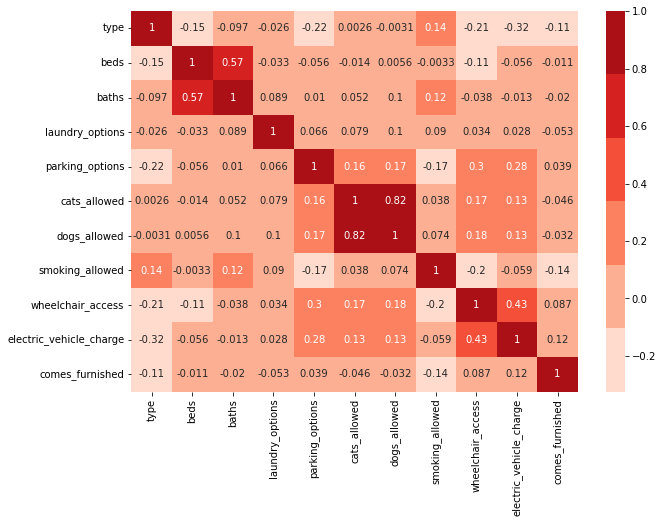

In [88]:
corr = dataForLogisticRegression[['type','beds','baths','laundry_options', 'parking_options', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']].corr()
colormap = sns.color_palette("Reds")
sns.heatmap(corr, annot = True, cmap = colormap)
plt.gcf().set_size_inches(10, 7)

After that we split the data into 67% train and 33% test data respectively

In [89]:
X = dataForLogisticRegression[['laundry_options','beds','baths','parking_options','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished']]
y = dataForLogisticRegression['type']
# y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

After that we perform the model fitting 

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

# ROC and AUC Test

Classification performance determination

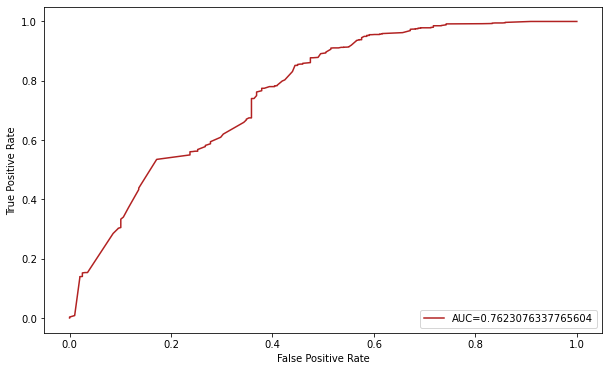

In [91]:
#define metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr,tpr,label="AUC="+str(auc), color="firebrick")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Ideally, both axis should move toward one, and the AUC, or area under the curve of this chart, should be close to one as well. In this case, the area under the curve is 0.75, which is acceptable.

# Classification Report

We performed the classification report to analyze our prediction result.

In [92]:
predictions = logmodel.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.26      0.39       198
           1       0.91      0.99      0.95      1593

    accuracy                           0.91      1791
   macro avg       0.86      0.62      0.67      1791
weighted avg       0.90      0.91      0.89      1791



In the classification report, the model achieved an accuracy of 0.92, indicating an outstanding prediction. However, we obtained a low recall and precision; we must look into the possible causes for this result.

# Confusion Matrix

After that, we created the confusion matrix to observe the predicted values compared to the actual values. 

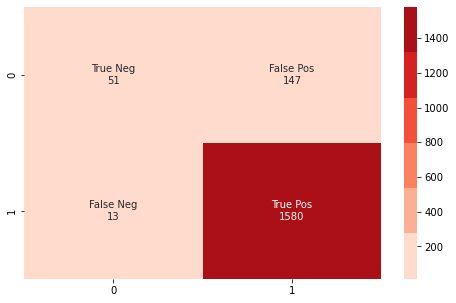

In [94]:
matrix = confusion_matrix(y_test,predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(matrix, annot=labels, fmt='', cmap=colormap)
plt.show()

Based on the chart, we can see that our algorithms accurately predict the true positive of apartment type by getting the true positive result of more than 1000 and the false positive result by only 87 predictions. We can see that our prediction is a little bit bias in this case. This could be the possible reason that we got low recall and precision outcome. 

# Regression Coefficient and Odd Ratio 

According to the coefficient, positive coefficients indicate that the event becomes more likely to happen as the predictor increases. Negative coefficients represent that the event becomes less likely to happen as the predictor increases. 

In [95]:
#Using statsmodels package to obtian the model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.251355
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                 3636
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Oct 2022   Pseudo R-squ.:                  0.1987
Time:                        22:50:33   Log-Likelihood:                -913.93
converged:                       True   LL-Null:                       -1140.6
Covariance Type:            nonrobust   LLR p-value:                 4.054e-91
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.2963      0.642      8.253      0.000       4.038   

After that, I convert the model coefficient to the odds ratio to better understand how each independent variable influences the response variable. In this case, we can imply that for each one-unit increase in the number of beds, the odds of apartment type rose by a factor of approximately 1.08, or one unit changing of the laundry option rose the odds of the apartment type by 1.11.

In [96]:
print(f'Odd Ratio:\n\n{np.exp(result.params)}')

Odd Ratio:

const                      199.591841
laundry_options              0.330313
beds                         0.353994
baths                        0.831737
parking_options              0.372096
cats_allowed                 1.278866
dogs_allowed                 1.441061
smoking_allowed              1.891123
wheelchair_access            0.391857
electric_vehicle_charge      0.089060
comes_furnished              0.714010
dtype: float64


# Random Forest Model

To predict the region and number of beds, the Random Forest Classifier will be used. The feature engineering and feature selection, on the other hand, will differ from the rest of the models.

<AxesSubplot:xlabel='region', ylabel='count'>

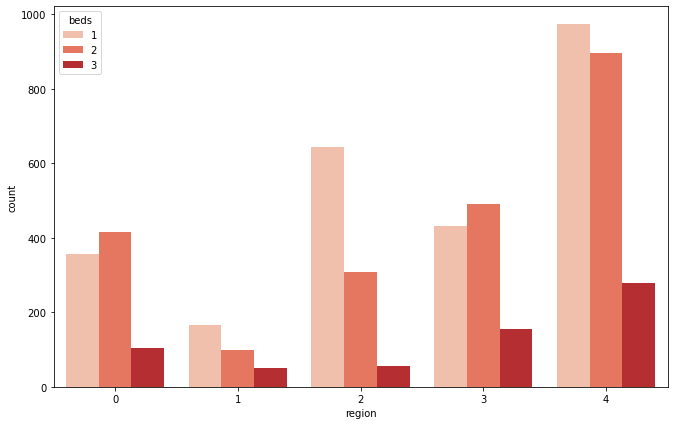

In [97]:
prac = dataForRandomForest.copy()
condition1 = dataForRandomForest['beds'] == '0'
dataForRandomForest.drop(dataForRandomForest.loc[dataForRandomForest['beds']==0].index, inplace=True)
plt.figure(figsize=(11,7))
sns.countplot(x='region',hue='beds',data=dataForRandomForest,palette='Reds')

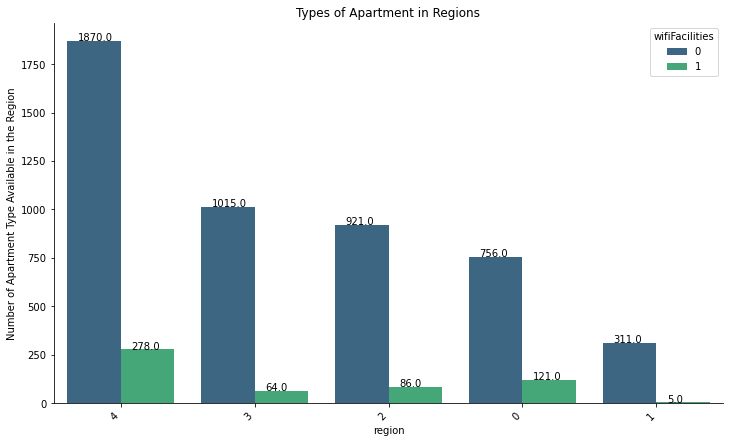

In [98]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
plt.figure(figsize=(12,7))
ax = sns.countplot("region", data = dataForRandomForest, hue = 'wifiFacilities',order = dataForRandomForest['region'].value_counts().index,palette='viridis')
plt.title("Types of Apartment in Regions")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of Apartment Type Available in the Region')
annot_plot(ax,0.08,1)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

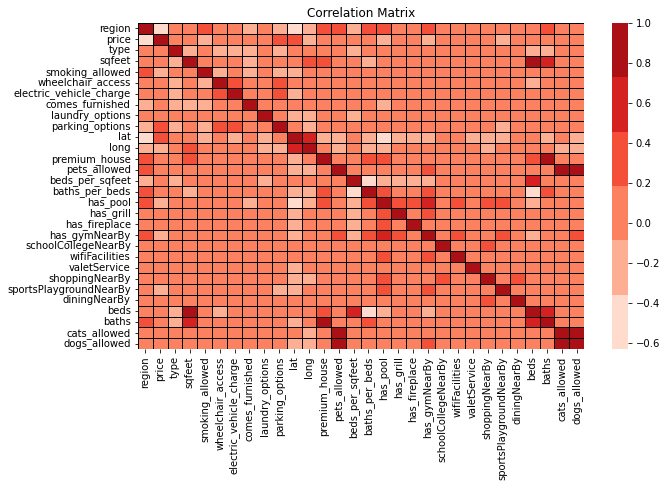

In [99]:
colormap = sns.color_palette("Reds")
sns.heatmap(dataForRandomForest.corr(),cmap=colormap,linewidths=1,linecolor='black')
plt.title('Correlation Matrix')

In [100]:
df = pd.read_csv('houserentpredictiondataset\houseRent\housing_train.csv')
#Passing dataframe-df and column name-'laundry_options' as it conatins null values. This function will return 'PERP_RACE' column with 0 null values.
col = 'laundry_options'
df[col].value_counts()
s = df[col].value_counts(normalize=True)
#print('Values present in the columns with percentage')
#print(s)
missing = df[col].isnull()
df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
#print('Null values filled with appropriate data')
df[col].value_counts()

#Passing dataframe-df and column name-'parking_options' as it conatins null values. This function will return 'parking_options' column with 0 null values.
col = 'parking_options'
df[col].value_counts()
s = df[col].value_counts(normalize=True)
#print('Values present in the columns with percentage')
#print(s)
missing = df[col].isnull()
df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
#print('Null values filled with appropriate data')
df[col].value_counts(normalize=True)

#Drop all the apartment type that is not interest except condo,apartment and house
df = df[df['type'].str.contains('apartment|house|townhouse')]
#Select only the top five cities that has the most university and premium house
df = df[(df['beds']>0)& (df['baths']>0) & (df['region'].str.contains('chicago|los angeles|new york city|atlanta|boston'))]

# Encode categorical variable for laundry options and garage options
def encode_laundry(laundry):
    if laundry == 'no laundry on site':
        return 0
    else:
        return 1
def encode_garage(garage):
    if garage in ['detached garage','attached garage','carport','valet parking']:
        return 1
    else:
        return 0
def encode_type(house_type):
    if house_type in ['apartment','condo','duplex']:
        return 1
    else:
        return 0
df['laundry_options'] = np.vectorize(encode_laundry)(df['laundry_options'])
df['garage_options'] = np.vectorize(encode_garage)(df['parking_options'])
df['type'] = np.vectorize(encode_type)(df['type'])

In [101]:
#Treat the outlier for price
data = df
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['price'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
#print('low_limit is', low_lim)
#print('up_limit is', up_lim)
outlier =[]
for x in data['price']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
#print(' outlier in the dataset is ', outlier )
data.drop(data[data['price'].isin(outlier)].index, inplace=True)

#Treat the outlier for sqfeet
Q1 = np.percentile(data['sqfeet'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['sqfeet'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['sqfeet'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
#print('low_limit is', low_lim)
#print('up_limit is', up_lim)
outlier =[]
for x in data['sqfeet']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
#print(f' outlier in the dataset is ', outlier )
data.drop(data[data['sqfeet'].isin(outlier)].index, inplace=True)

#Treat the outlier for bed
Q1 = np.percentile(data['beds'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['beds'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['beds'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
#print('low_limit is', low_lim)
#print('up_limit is', up_lim)
outlier =[]
for x in data['beds']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
#print(f' outlier in the dataset is ', outlier )
data.drop(data[data['beds'].isin(outlier)].index, inplace=True)

#Treat the outlier for bath
Q1 = np.percentile(data['baths'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['baths'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['baths'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
#print('low_limit is', low_lim)
#print('up_limit is', up_lim)
outlier =[]
for x in data['baths']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
#print(f' outlier in the dataset is ', outlier )
data.drop(data[data['baths'].isin(outlier)].index, inplace=True)

In [102]:
#One of the most critical steps in our case study was the creation of additional columns that may be used in Classification/Regression. In our dataframe, we have a **Description column** that contains the description of the apartment/house. We will feature 
#engineer the description column and create new columns such as has pool, has grill, school/clg nearby, and so forth. 
data['has_pool'] = data['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
data['has_grill'] = data['description'].apply(lambda x: 1 if 'grill' in x.lower() or 'grilling' in x.lower() else 0)
data['has_fireplace'] = data['description'].apply(lambda x: 1 if 'fireplace' in x.lower() or 'fire pits' in x.lower() else 0)
data['gym_nearby'] = data['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() else 0)
data['school/clg_nearby'] = data['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
data['wifi_facilities'] = data['description'].apply(lambda x: 1 if 'wifi' in x.lower() or 'wi-fi' in x.lower() else 0)
data['valet_service'] = data['description'].apply(lambda x: 1 if 'valet' in x.lower() else 0)
data['shopping_nearby'] = data['description'].apply(lambda x: 1 if 'shopping' in x.lower() else 0)
data['sports_playground'] = data['description'].apply(lambda x: 1 if 'sport' in x.lower()  or 'sports' in x.lower() 
                                                      or 'tennis' in x.lower() or 'soccer' in x.lower() 
                                                      or 'soccers' in x.lower() or 'court' in x.lower() else 0)
data['dining_nearby'] = data['description'].apply(lambda x: 1 if 'dining' in x.lower() else 0)

#Adding boolean values to the columns created in above cell
for var in ['has_pool', 'has_grill', 'has_fireplace', 'gym_nearby',
       'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby']:
    print(data[var].value_counts())

0    3603
1    3151
Name: has_pool, dtype: int64
0    5844
1     910
Name: has_grill, dtype: int64
0    5558
1    1196
Name: has_fireplace, dtype: int64
0    3863
1    2891
Name: gym_nearby, dtype: int64
0    5806
1     948
Name: school/clg_nearby, dtype: int64
0    6016
1     738
Name: wifi_facilities, dtype: int64
0    6540
1     214
Name: valet_service, dtype: int64
0    4940
1    1814
Name: shopping_nearby, dtype: int64
0    4441
1    2313
Name: sports_playground, dtype: int64
0    4872
1    1882
Name: dining_nearby, dtype: int64


# Important module to install.

In [103]:
!pip install pretty_confusion_matrix

<AxesSubplot:xlabel='region', ylabel='count'>

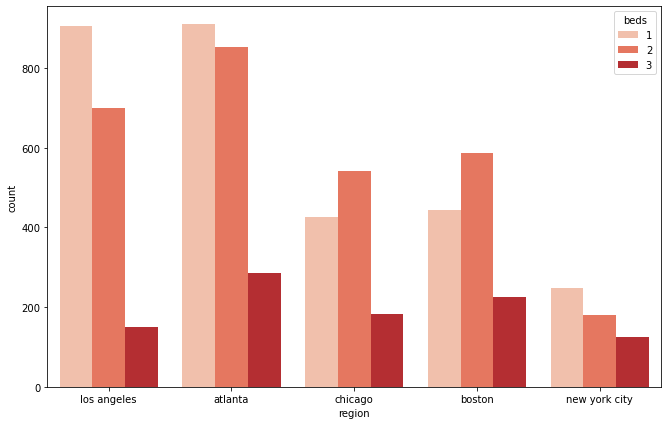

In [104]:
plt.figure(figsize=(11,7))
sns.countplot(x='region',hue='beds',data=data,palette='Reds')

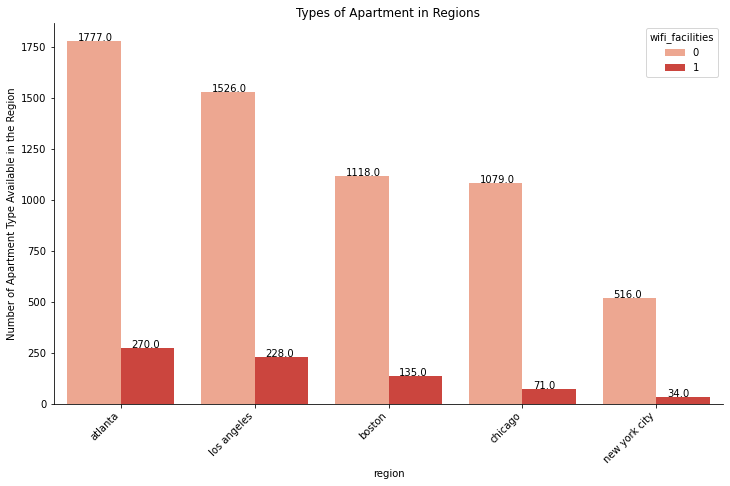

In [105]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
plt.figure(figsize=(12,7))
ax = sns.countplot("region", data = data, hue = 'wifi_facilities',order = data['region'].value_counts().index,palette='Reds')
plt.title("Types of Apartment in Regions")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of Apartment Type Available in the Region')
annot_plot(ax,0.08,1)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       597
           1       0.67      0.72      0.69       372
           2       0.76      0.70      0.73       349
           3       0.80      0.86      0.83       552
           4       0.65      0.46      0.54       157

    accuracy                           0.80      2027
   macro avg       0.76      0.74      0.75      2027
weighted avg       0.80      0.80      0.80      2027



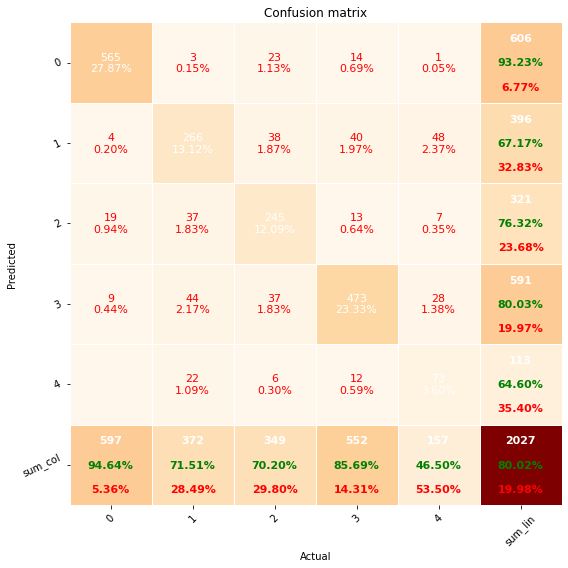

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature Importance for Random Forest Model while predicting Region


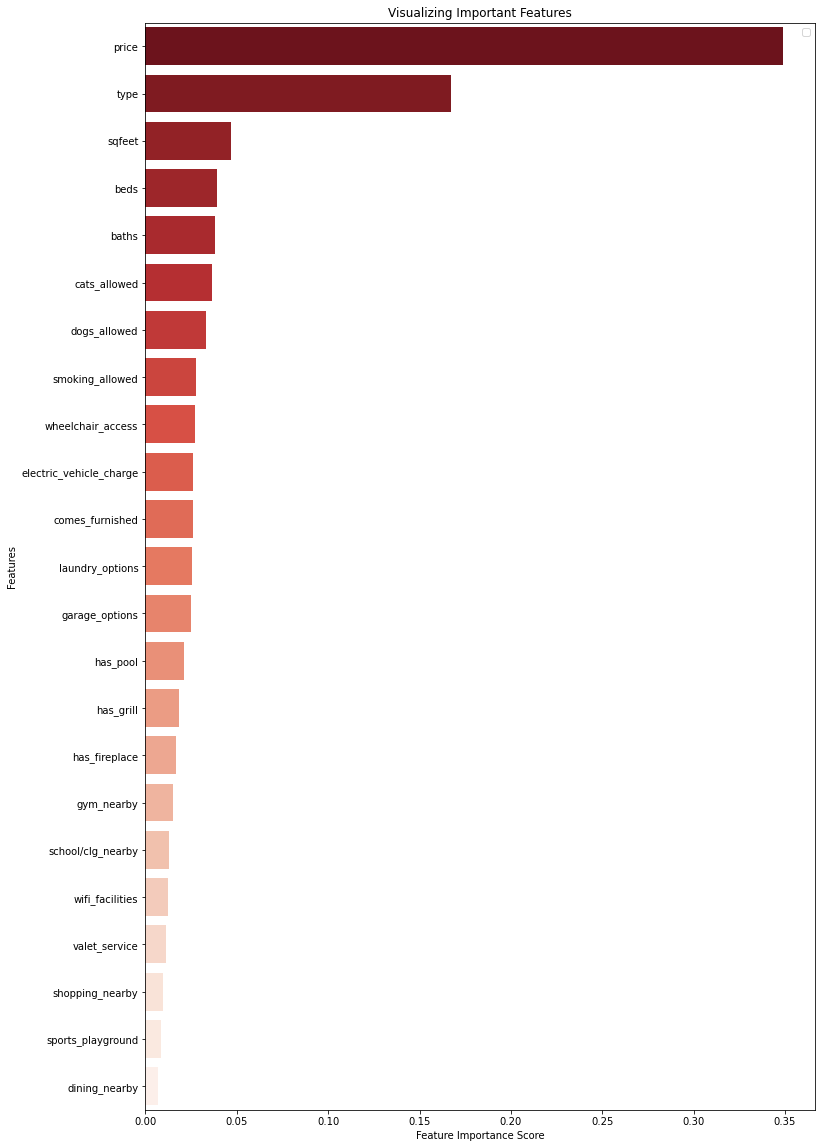

In [106]:
#Randome Forest Model

from pretty_confusion_matrix import pp_matrix

#encoding region to numeric values
from sklearn.ensemble import RandomForestClassifier
data.region=data.region.astype('category').cat.codes
drop1 =['id', 'region','state','description', 'lat', 'long','url', 'description', 'region_url', 'parking_options', 'state', 'image_url']
X = data.drop(drop1,axis=1)
y = data['region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#Calling the predict_model function from Utility file and making the predictions.
#Please check the utility file to get more details about the utility function.
utility.predict_model(RandomForestClassifier(n_estimators=600),X_train,X_test,y_train,y_test)


**Predicting Number of Beds**

              precision    recall  f1-score   support

           1       0.92      0.91      0.92       887
           2       0.81      0.87      0.84       851
           3       0.77      0.63      0.69       289

    accuracy                           0.85      2027
   macro avg       0.83      0.81      0.82      2027
weighted avg       0.85      0.85      0.85      2027



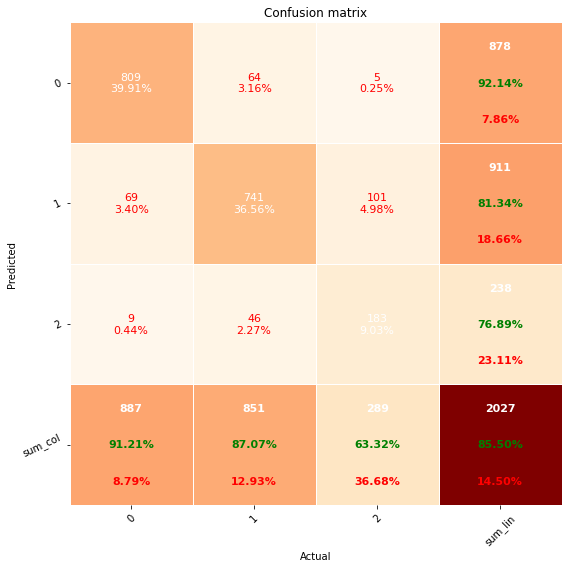

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature Importance for Random Forest Model while predicting Region


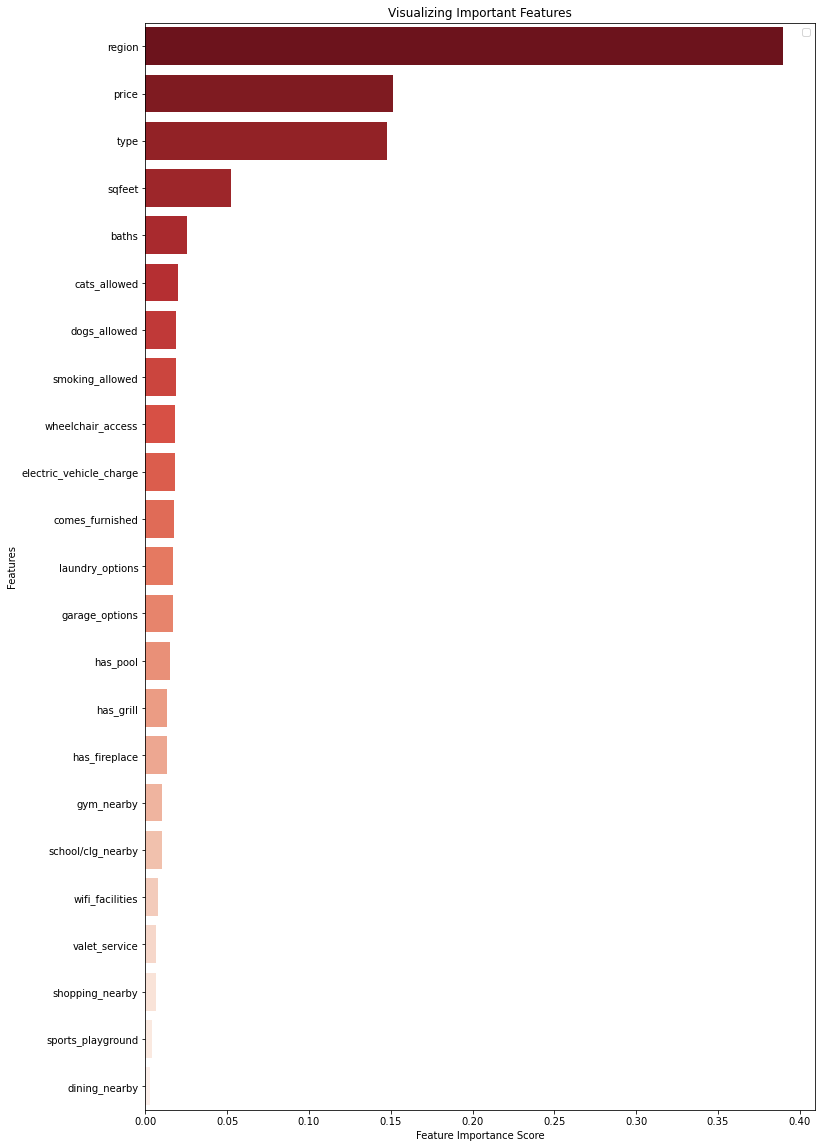

In [107]:
drop1 =['id','beds','state','description', 'lat', 'long','url', 'description', 'region_url', 'parking_options', 'state', 'image_url']
X = data.drop(drop1,axis=1)
y = data['beds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#Calling the predict_model function from Utility file and making the predictions.
#Please check the utility file to get more details about the utility function.
utility.predict_model(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test)

**<h1>Conclusion:**

## Predict the Price of the Apartment using Random Forest Regression
Our first question from this project was to determine the price of an apartment based on the features like beds, baths, pets_allowed and the other newly engineered features.
We Used three regression models to predict the price.
    
    1. We Linear Regression the worst performance was achieved. We observed MAE to be 0.257, RMSE was equal to 0.453 and R2_Score was 0.157. Since it was not good enough. We decided to check with Random Forest!
   
    2.Now we used Random Forest and achieved really good results. There was a significant increase in the performance metrices.
    
    3.Just to be sure we also predicted the price using XgBoost Regression. Performance was not as good as Random Forest.Next we used some custom parameters to try to change the performace but still none of the two were performing better than Random Forest.
   
   
So based on our Observation, the best regression model to predict the price was Random Forest.   



## Predict the type of the Apartment using Logistic Regression

For the logistic regression, the answer that we got from this analysis is that the factor that has the most influence in altering the residential type is wheelchair access, followed by cat and dog allowed according to the odd ratio result.

#### Further analysis

The overall accuracy that we have for the prediction is 0.92 which is excellent. However, the data we have is a little bit bias since we got the apartment data over house data by over ten times. Therefore, we can resolve this issue by resampling the data or cluster the abundant class instead of relying on random samples to cover the variety of the training samples.
 



## Predict the number of beds in a apartment based on Random Forest Classification

* For the city prediction, the most important feature for our prediction is the price, and the least 
important feature is dining nearby. The acuuracy score we recieved for city predicition is around 80%.
* For number of bed prediction, while the most important feature that affects the number of 
bedrooms is the region and the least is the dining nearby.The acuuracy score we recieved for city predicition is around 85%.